# Random Forest Theory on Classification

In [62]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [63]:
x, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [64]:
df = pd.DataFrame(x, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

In [65]:
df

,col1,col2,col3,col4,col5,target
0,0.803839,-0.906670,-0.711278,-1.063570,-1.440861,1
1,2.665873,-2.438000,0.478483,0.079203,-3.131747,1
2,0.633940,-0.480652,0.535411,-1.363171,-0.820800,1
3,0.255137,-1.168360,-2.975189,-5.553673,-0.813651,0
4,-1.098455,-2.083710,-4.187775,-1.603733,2.044725,0
...,...,...,...,...,...,...
95,0.658164,-3.133429,-2.695204,-0.256873,2.056028,0
96,1.947072,-1.604870,0.199636,0.512550,-1.806784,1
97,2.146148,-0.538570,0.204140,1.424859,2.628414,0
98,0.826254,-1.028523,-0.638992,-1.710127,-1.267816,1


In [66]:
def sample_rows(df, percent):
    return df.sample(int(percent * df.shape[0]), replace=True)

In [88]:
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [68]:
def combine_samples(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

## Sample Rows

In [69]:
df1 = sample_rows(df, 0.2)

In [70]:
df1

,col1,col2,col3,col4,col5,target
7,2.198757,-1.584608,-0.433844,-0.356843,-2.664595,1
19,-0.785519,0.082200,-0.457234,-2.721229,0.492308,1
8,0.361215,-1.865232,-2.018751,-0.390038,1.066334,0
69,3.412583,-2.109419,0.604536,1.007313,-2.771470,1
3,0.255137,-1.168360,-2.975189,-5.553673,-0.813651,0
43,0.193981,0.132362,-0.010927,1.697096,-0.794118,1
30,3.305143,-1.647607,-0.789298,-0.188614,-2.844453,1
33,1.925229,-1.289183,-1.638477,-1.061100,2.176851,0
49,1.195141,-0.127623,-0.718106,-3.616466,0.251622,0
83,0.392666,-1.858584,-0.600757,-1.756164,-0.464219,0


In [71]:
df2 = sample_rows(df, 0.2)

In [72]:
df3 = sample_rows(df, 0.2)

In [73]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [74]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

[Text(0.5, 0.875, 'x[2] <= -0.529\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.25, 0.625, 'x[4] <= -1.829\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.75, 0.625, 'x[3] <= -1.538\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= -0.338\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

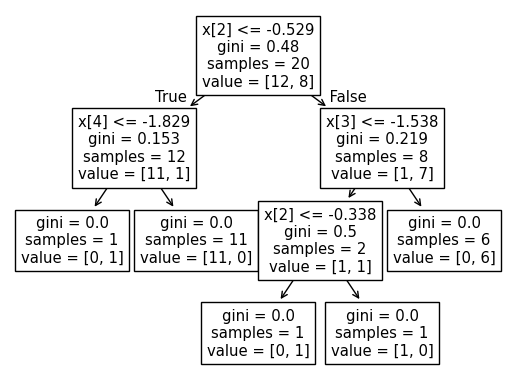

In [75]:
plot_tree(clf1)

[Text(0.5714285714285714, 0.9166666666666666, 'x[2] <= -0.715\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.42857142857142855, 0.75, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.7142857142857143, 0.75, 'x[1] <= 0.169\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.6428571428571428, 0.8333333333333333, '  False'),
 Text(0.5714285714285714, 0.5833333333333334, 'x[2] <= 2.885\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.42857142857142855, 0.4166666666666667, 'x[1] <= -1.839\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.2857142857142857, 0.25, 'x[1] <= -1.988\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.7142857142857143, 0.4166666666666667,

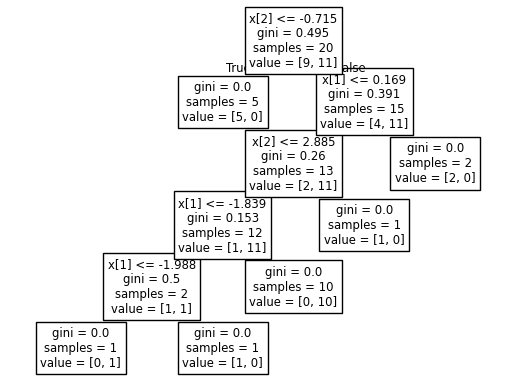

In [76]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[4] <= -0.345\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 2.558\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

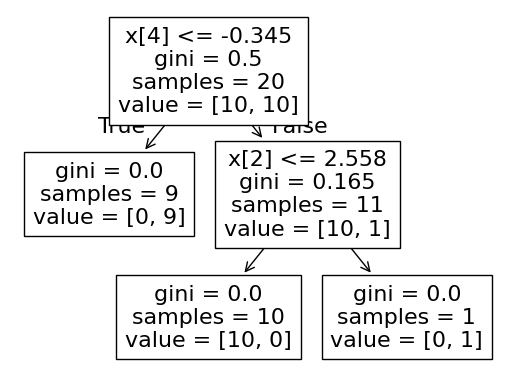

In [77]:
plot_tree(clf3)

In [78]:
clf1.predict(np.array([-0.511078, 1.288745, 0.445253, -1.935772, 0.773606]).reshape(1, 5))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [79]:
clf2.predict(np.array([-0.511078, 1.288745, 0.445253, -1.935772, 0.773606]).reshape(1, 5))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [80]:
clf3.predict(np.array([-0.511078, 1.288745, 0.445253, -1.935772, 0.773606]).reshape(1, 5))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## Sample Features

In [89]:
df1 = sample_features(df, 0.8)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\1670708720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [90]:
df2 = sample_features(df, 0.8)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\1670708720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [91]:
df3 = sample_features(df, 0.8)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\1670708720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [92]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [93]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

[Text(0.375, 0.9285714285714286, 'x[1] <= -1.043\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.08333333333333333, 0.7857142857142857, 'x[3] <= 0.075\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.22916666666666666, 0.8571428571428572, 'True  '),
 Text(0.041666666666666664, 0.6428571428571429, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.125, 0.6428571428571429, 'x[3] <= 0.37\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7857142857142857, 'x[3] <= -0.362\ngini = 0.45\nsamples = 73\nvalue = [25, 48]'),
 Text(0.5208333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[1] <= -0.189\ngini = 0.305\nsamples = 48\nvalue = [9, 39]'),
 Text(0.25, 0.5, 'x[0] <= -1.733\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.20833333333333334, 0.3571428571

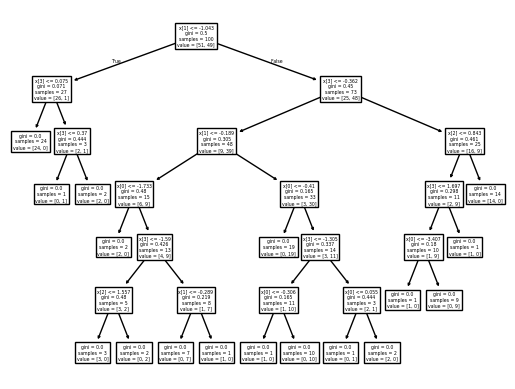

In [94]:
plot_tree(clf1)

[Text(0.44047619047619047, 0.9166666666666666, 'x[0] <= -0.766\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.19047619047619047, 0.75, 'x[3] <= -0.323\ngini = 0.234\nsamples = 37\nvalue = [5, 32]'),
 Text(0.31547619047619047, 0.8333333333333333, 'True  '),
 Text(0.09523809523809523, 0.5833333333333334, 'x[2] <= -1.997\ngini = 0.114\nsamples = 33\nvalue = [2, 31]'),
 Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[2] <= 3.002\ngini = 0.061\nsamples = 32\nvalue = [1, 31]'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.19047619047619047, 0.25, 'x[1] <= 2.049\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23809523809523808, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[0] <= -0.848\ngin

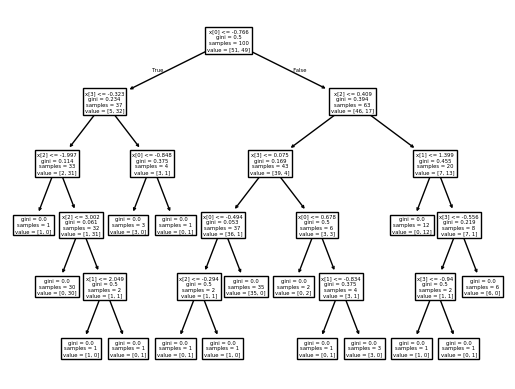

In [95]:
plot_tree(clf2)

[Text(0.3541666666666667, 0.9285714285714286, 'x[3] <= -0.766\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.08333333333333333, 0.7857142857142857, 'x[2] <= -3.22\ngini = 0.234\nsamples = 37\nvalue = [5, 32]'),
 Text(0.21875, 0.8571428571428572, 'True  '),
 Text(0.041666666666666664, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.125, 0.6428571428571429, 'x[1] <= 3.002\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.16666666666666666, 0.5, 'x[3] <= -1.294\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.20833333333333334, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.7857142857142857, 'x[1] <= 0.409\ngini = 0.394\nsamples = 63\nvalue = [46, 17]'),
 Text(0.48958333333333337, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[0

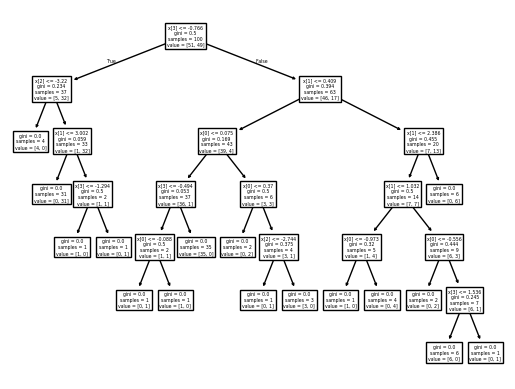

In [97]:
plot_tree(clf3)

In [98]:
df3

,col2,col3,col4,col5,target
0,-0.906670,-0.711278,-1.063570,-1.440861,1
1,-2.438000,0.478483,0.079203,-3.131747,1
2,-0.480652,0.535411,-1.363171,-0.820800,1
3,-1.168360,-2.975189,-5.553673,-0.813651,0
4,-2.083710,-4.187775,-1.603733,2.044725,0
...,...,...,...,...,...
95,-3.133429,-2.695204,-0.256873,2.056028,0
96,-1.604870,0.199636,0.512550,-1.806784,1
97,-0.538570,0.204140,1.424859,2.628414,0
98,-1.028523,-0.638992,-1.710127,-1.267816,1


In [99]:
clf1.predict(np.array([-0.906670, -0.711278, -1.063570, -1.440861]).reshape(1, 4))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [100]:
clf2.predict(np.array([-0.906670, -0.711278, -1.063570, -1.440861]).reshape(1, 4))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [101]:
clf3.predict(np.array([-0.906670, -0.711278, -1.063570, -1.440861]).reshape(1, 4))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Combine Feature

In [105]:
df1 = combine_samples(df, 0.5, 0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\1670708720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [106]:
df2 = combine_samples(df, 0.5, 0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\1670708720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [107]:
df3 = combine_samples(df, 0.5, 0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\1670708720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [116]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [117]:
clf1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:2], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:2], df3.iloc[:, -1])

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

[Text(0.2826086956521739, 0.9444444444444444, 'x[1] <= -3.388\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.1956521739130435, 0.8333333333333334, 'x[0] <= 0.114\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2391304347826087, 0.8888888888888888, 'True  '),
 Text(0.15217391304347827, 0.7222222222222222, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2391304347826087, 0.7222222222222222, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3695652173913043, 0.8333333333333334, 'x[1] <= -2.45\ngini = 0.458\nsamples = 45\nvalue = [16.0, 29.0]'),
 Text(0.32608695652173914, 0.8888888888888888, '  False'),
 Text(0.32608695652173914, 0.7222222222222222, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.41304347826086957, 0.7222222222222222, 'x[1] <= -0.729\ngini = 0.484\nsamples = 39\nvalue = [16, 23]'),
 Text(0.17391304347826086, 0.6111111111111112, 'x[1] <= -1.76\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.08695652173913043, 0.5, 'x[0] <= 0.704\ngini = 0.48\n

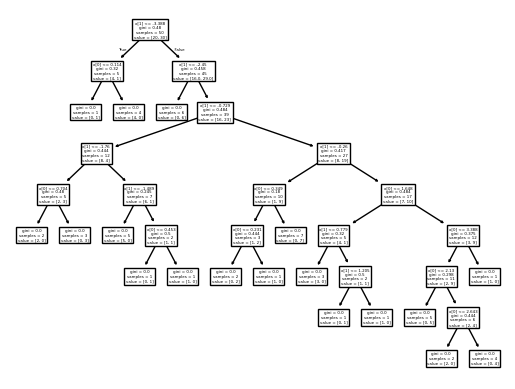

In [118]:
plot_tree(clf1)

[Text(0.4, 0.9285714285714286, 'x[1] <= -0.644\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.2, 0.7857142857142857, 'x[1] <= -0.859\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.30000000000000004, 0.8571428571428572, 'True  '),
 Text(0.1, 0.6428571428571429, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.3, 0.6428571428571429, 'x[1] <= -0.787\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.7857142857142857, 'x[0] <= -0.417\ngini = 0.426\nsamples = 26\nvalue = [8, 18]'),
 Text(0.5, 0.8571428571428572, '  False'),
 Text(0.5, 0.6428571428571429, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.7, 0.6428571428571429, 'x[1] <= 0.814\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.6, 0.5, 'x[0] <= -0.195\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 T

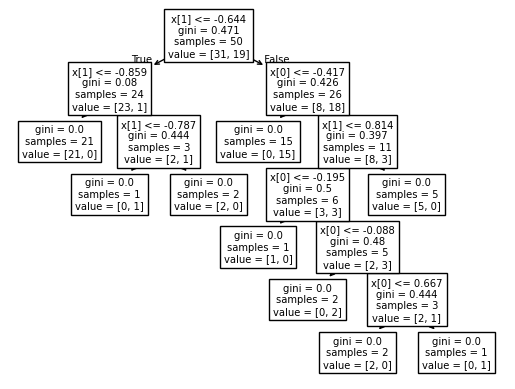

In [119]:
plot_tree(clf2)

[Text(0.4583333333333333, 0.95, 'x[1] <= -1.744\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.25, 0.85, 'x[0] <= -0.356\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.35416666666666663, 0.8999999999999999, 'True  '),
 Text(0.16666666666666666, 0.75, 'x[1] <= -2.566\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.08333333333333333, 0.65, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.25, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.6666666666666666, 0.85, 'x[1] <= 1.691\ngini = 0.428\nsamples = 29\nvalue = [9, 20]'),
 Text(0.5625, 0.8999999999999999, '  False'),
 Text(0.5833333333333334, 0.75, 'x[0] <= 0.518\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.4166666666666667, 0.65, 'x[1] <= -0.392\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.55, 'x[0] <= 0.068\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.45, 'gini = 0.0\

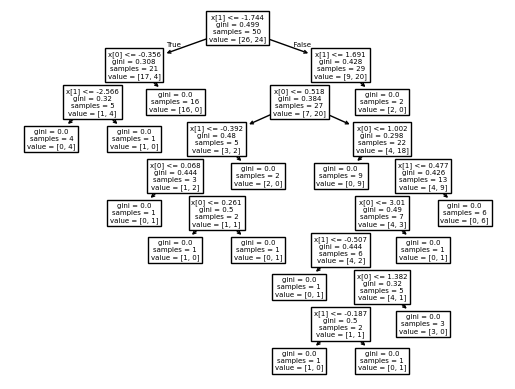

In [120]:
plot_tree(clf3)

In [121]:
df2

,col2,col3,target
33,-1.289183,-1.638477,0
24,-0.084748,-0.018163,0
11,-0.667891,0.139101,1
9,-1.691347,1.069609,1
88,1.266257,0.057826,1
49,-0.127623,-0.718106,0
41,-2.071565,-2.198860,0
87,0.255614,1.064129,0
7,-1.584608,-0.433844,1
7,-1.584608,-0.433844,1


In [122]:
clf1.predict(np.array([-0.084748, -0.018163]).reshape(1, 2))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [123]:
clf2.predict(np.array([-0.084748, -0.018163]).reshape(1, 2))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [124]:
clf3.predict(np.array([-0.084748, -0.018163]).reshape(1, 2))

c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])